In [ ]:
!pip install scprep umap-learn magic-impute s_gd2 hdbscan

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
import umap

import time

def run_pca(data,n_components=30,random_state =1):
    today= time.ctime()
  
    
    pca = PCA(n_components=n_components, random_state=random_state)
    pca_data= pca.fit_transform(data)
    print('process start',today)
    return pca_data


def run_umap(pca_data, n_neighbors=15, n_components=2, metric='euclidean', metric_kwds=None,
             output_metric='euclidean', output_metric_kwds=None, n_epochs=None, learning_rate=1.0, 
             init='spectral', min_dist=0.1, spread=1.0, low_memory=True, n_jobs=-1, set_op_mix_ratio=1.0, 
             local_connectivity=1.0, repulsion_strength=1.0, negative_sample_rate=5, transform_queue_size=4.0,
             a=None, b=None, random_state=None, angular_rp_forest=False, target_n_neighbors=-1,
             target_metric='categorical', target_metric_kwds=None, target_weight=0.5, transform_seed=42,
             transform_mode='embedding', force_approximation_algorithm=False, verbose=False, 
             unique=False, densmap=False, dens_lambda=2.0, dens_frac=0.3, dens_var_shift=0.1, 
             output_dens=False, disconnection_distance=None):
    
    fit = umap.UMAP(n_neighbors, n_components, metric, metric_kwds,
             output_metric, output_metric_kwds, n_epochs, learning_rate, 
             init, min_dist, spread, low_memory, n_jobs, set_op_mix_ratio, 
             local_connectivity, repulsion_strength, negative_sample_rate, transform_queue_size,
             a, b, random_state, angular_rp_forest, target_n_neighbors,
             target_metric, target_metric_kwds, target_weight, transform_seed,
             transform_mode, force_approximation_algorithm, verbose, 
             unique, densmap, dens_lambda, dens_frac, dens_var_shift, 
             output_dens, disconnection_distance)
    dim_reduction = fit.fit_transform(pca_data)
    
    return dim_reduction


def sc_PHENIX(data, umap_data,t=10,decay=15,metric='euclidean',knn=10):



    print('calculando distancias')
    
    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix
    
    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))
    
    knn_dst = np.sort(distance_matrix, axis=1)
    

    epsilon = knn_dst[:,knn]
    
    
    pdx_scale = (distance_matrix / epsilon).T 
    
    E = np.exp(-1 * ( pdx_scale ** decay))
    
    print(' afinity matrix done')
    
    A = (E + E.T)
    
    diff_deg = np.diag(np.sum(A,0))
    
    
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))
    
    print('imputation')
    
    Matix_col_genes_row_cell2 = (data +1) - data
    
    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2
    
    Matix_impu = Matix_col_genes_row_cell2 + data_new

    
    sc_PHENIX = Matix_impu 
    
    print('done')
    end= time.ctime()
    print('done',end)


    return (sc_PHENIX)


def sc_PHENIX_R(data, umap_data, t=10,decay=15,metric='cosine',knn=10):
    


    print('calculando distancias eucle')
    
    distance_matrix =pdist(umap_data, metric)
    distance_matrix = (squareform(distance_matrix))
    D = distance_matrix
    
    print(distance_matrix.shape)
    print('done distance matrix')
    print('knn')

    print(' knn done')
    print(' afinity matrix')


    n,m =D.shape

    E = np.zeros((m,m))
    
    knn_dst = np.sort(distance_matrix, axis=1)
    

    epsilon = knn_dst[:,knn]
    
    
    pdx_scale = (distance_matrix / epsilon).T 
    
    E = np.exp(-1 * ( pdx_scale ** decay))
    
    print(' afinity matrix done')
    
    A = (E + E.T)
    
    diff_deg = np.diag(np.sum(A,0))
    
    
    diff_op = np.dot(np.diag(np.diag(diff_deg)**(-1)),A)
    

    new_matrix =  np.linalg.matrix_power(diff_op, t)


    data_new = np.array(np.dot(new_matrix,data))



    rescale_percent =99.99
    M99 = np.percentile(data, rescale_percent, axis=0)
    M100 = data.max(axis=0)
    indices = np.where(M99 == 0)[0]
    M99[indices] = M100[indices]



    M99_new = np.percentile(data_new, rescale_percent, axis=0)
    M100_new = data_new.max(axis=0)
    indices = np.where(M99_new == 0)[0]
    M99_new[indices] = M100_new[indices]


    max_ratio = np.divide(M99, M99_new)
    data_new = np.multiply(data_new, np.tile(max_ratio, (len(data), 1)))



    print('reescalate')

    
    print('imputation')
    
    Matix_col_genes_row_cell2 = (data +1) - data
    
    Matix_col_genes_row_cell2 = Matix_col_genes_row_cell2 - Matix_col_genes_row_cell2
    
    Matix_impu = Matix_col_genes_row_cell2 + data_new

    
    Matix_impu = Matix_impu 
    
    print('done')
    end= time.ctime()
    print('done',end)


    return (Matix_impu)

In [ ]:
import pandas as pd
day_clus = pd.read_csv('/content/Clusters_dist.csv')
day_clus

,Names,X1,X2,Cluster
0,D19_1,-1.472687,-4.765218,3
1,D19_10,1.083237,3.160249,1
2,D19_100,0.756240,-1.242957,2
3,D19_101,0.495016,-0.165445,2
4,D19_102,-1.322899,-0.786515,2
...,...,...,...,...
358,D6_95,0.145756,1.044993,2
359,D6_96,-1.465150,2.300778,1
360,D6_97,0.062696,-6.033323,3
361,D6_98,1.471117,0.528763,2


In [ ]:
day_clus = day_clus.rename(columns={"Names": "index"})

In [ ]:
raw = pd.read_csv('MCTS_b.csv',sep=';',index_col=0).T.reset_index()

In [ ]:

raw

,index,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
0,D6_1,0,0,0,0,0,0,0,8,2,...,0,0,0,0,0,0,0,0,0,0
1,D6_2,0,0,0,0,2,0,0,4,10,...,0,0,0,0,0,0,0,0,0,0
2,D6_3,0,0,0,0,0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
3,D6_4,2,0,2,0,0,0,0,0,11,...,0,0,0,0,0,0,0,0,0,0
4,D6_5,2,0,0,0,0,0,1,4,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,D19_226,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
360,D19_227,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361,D19_228,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
362,D19_229,0,4,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
result_all = pd.merge(raw,day_clus,on='index')
result_all

,index,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,...,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P,X1,X2,Cluster
0,D6_1,0,0,0,0,0,0,0,8,2,...,0,0,0,0,0,0,0,-1.068019,-4.154163,3
1,D6_2,0,0,0,0,2,0,0,4,10,...,0,0,0,0,0,0,0,0.430111,1.102717,2
2,D6_3,0,0,0,0,0,0,0,5,7,...,0,0,0,0,0,0,0,-1.037960,-6.476896,3
3,D6_4,2,0,2,0,0,0,0,0,11,...,0,0,0,0,0,0,0,-0.612801,-6.390413,3
4,D6_5,2,0,0,0,0,0,1,4,9,...,0,0,0,0,0,0,0,-1.357999,-6.473364,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,D19_226,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.347560,-3.978606,3
359,D19_227,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.624496,-1.168456,2
360,D19_228,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,-1.867982,3.517514,1
361,D19_229,0,4,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,-1.386026,-0.861408,2


In [ ]:
days_index=result_all['index'] 
days_index

0         D6_1
1         D6_2
2         D6_3
3         D6_4
4         D6_5
        ...   
358    D19_226
359    D19_227
360    D19_228
361    D19_229
362    D19_230
Name: index, Length: 363, dtype: object

In [ ]:
umap= result_all.iloc[:,23923:23925]
umap['index'] = days_index
umap =umap.set_index('index')
umap_coord= umap

In [ ]:
cluster = result_all.iloc[:,23925:23926]
cluster

cluster['index'] = days_index
cluster =cluster.set_index('index')
cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Cluster
index,
D6_1,3
D6_2,2
D6_3,3
D6_4,3
D6_5,3
...,...
D19_226,3
D19_227,2
D19_228,1


In [ ]:
raw = result_all.iloc[:,:-3]
raw = raw.set_index('index')
raw

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
index,,,,,,,,,,,,,,,,,,,,,
D6_1,0,0,0,0,0,0,0,8,2,0,...,0,0,0,0,0,0,0,0,0,0
D6_2,0,0,0,0,2,0,0,4,10,0,...,0,0,0,0,0,0,0,0,0,0
D6_3,0,0,0,0,0,0,0,5,7,0,...,0,0,0,0,0,0,0,0,0,0
D6_4,2,0,2,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0
D6_5,2,0,0,0,0,0,1,4,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D19_226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D19_227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D19_228,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/scprep/plot/histogram.py:167: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  ax.set_xscale("symlog", linthresh=abs_min)


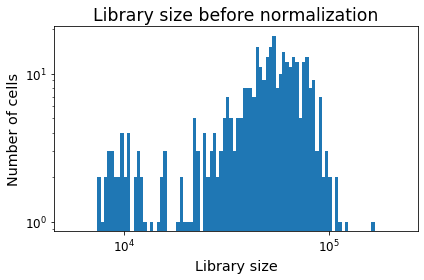

In [ ]:
import scprep
scprep.plot.plot_library_size(raw,title='Library size before normalization')

In [ ]:
#data normalization
data_norm, library_size = scprep.normalize.library_size_normalize(raw, return_library_size=True)

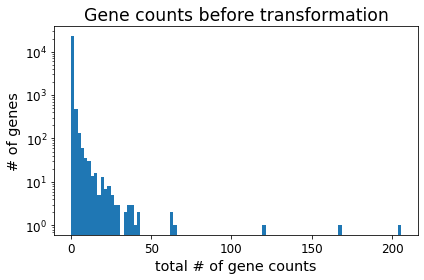

In [ ]:
scprep.plot.histogram(data_norm.mean(axis=0), log='y',
                      title="Gene counts before transformation",
                     xlabel='total # of gene counts',
                     ylabel='# of genes')

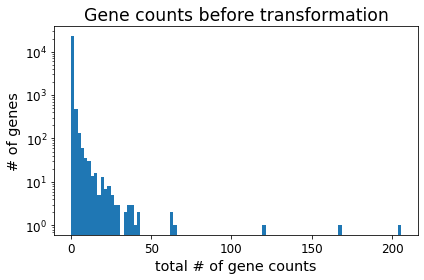

In [ ]:
scprep.plot.histogram(data_norm.mean(axis=0), log='y',
                      title="Gene counts before transformation",
                     xlabel='total # of gene counts',
                     ylabel='# of genes')

In [ ]:
data_sqrt = scprep.transform.sqrt(data_norm)

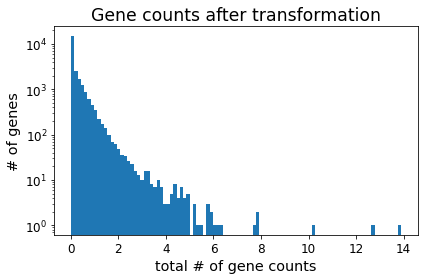

In [ ]:
scprep.plot.histogram(data_sqrt.mean(axis=0), log='y',
                      title="Gene counts after transformation",
                     xlabel='total # of gene counts',
                     ylabel='# of genes')

In [ ]:
X_phenix_norm_sqrt = sc_PHENIX(data_sqrt, umap_coord,t=5,decay=5,metric='euclidean',knn=20)

calculando distancias
(363, 363)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Wed Apr 20 19:44:35 2022


In [ ]:
X_phenix_norm_sqrt.to_csv('X_phenix_norm_sqrt.csv.gz',compression='gzip')

In [ ]:
X_phenix_norm_sqrt

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
index,,,,,,,,,,,,,,,,,,,,,
D6_1,0.051637,0.016514,0.034668,3.674368e-07,9.516784e-10,8.769978e-09,0.106170,0.512211,0.395763,2.724011e-03,...,0.0,1.474316e-18,3.161201e-27,6.988712e-30,1.795628e-18,2.072496e-28,0.0,4.462807e-35,0.0,0.004480
D6_2,0.025327,0.010359,0.035336,1.360492e-02,8.118271e-03,4.654993e-03,0.076616,0.454903,0.533335,6.955989e-06,...,0.0,1.315167e-03,6.071904e-05,2.526109e-06,7.258295e-04,2.242236e-05,0.0,1.774759e-05,0.0,0.002601
D6_3,0.065339,0.030611,0.049585,3.622702e-13,1.129393e-21,2.302530e-15,0.140253,0.451849,0.413027,1.981537e-02,...,0.0,5.889744e-51,5.883777e-77,4.920818e-78,3.372097e-47,6.063537e-82,0.0,4.806485e-83,0.0,0.012627
D6_4,0.066184,0.015355,0.044064,2.813604e-12,5.952663e-20,1.788679e-14,0.109589,0.510345,0.360434,7.867081e-03,...,0.0,3.101754e-49,3.100290e-75,2.673337e-79,1.775877e-45,1.504711e-78,0.0,2.441186e-81,0.0,0.004375
D6_5,0.065061,0.036825,0.051245,2.086565e-13,1.703317e-22,1.324780e-15,0.154164,0.429851,0.438121,2.492399e-02,...,0.0,8.946694e-52,1.252120e-77,4.873266e-77,5.122124e-48,3.457427e-81,0.0,2.378435e-83,0.0,0.016523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D19_226,0.054053,0.017856,0.030953,9.296060e-07,3.726209e-09,2.789881e-08,0.089394,0.508742,0.396617,3.590451e-04,...,0.0,6.537860e-18,1.402455e-26,3.098727e-29,7.962722e-18,9.194344e-28,0.0,4.966005e-34,0.0,0.000979
D19_227,0.003304,0.029829,0.053990,3.426120e-02,1.147908e-03,3.212408e-03,0.074127,0.334245,0.507784,5.611170e-11,...,0.0,1.722281e-06,6.359570e-09,2.062255e-13,1.492860e-06,4.695871e-10,0.0,3.533822e-11,0.0,0.005204
D19_228,0.009444,0.000859,0.039504,2.435596e-02,1.497410e-05,3.101668e-05,0.212605,0.383561,0.620476,1.039418e-02,...,0.0,5.522238e-05,8.871666e-08,3.965201e-03,1.164336e-04,1.452673e-08,0.0,1.509797e-07,0.0,0.000004


In [ ]:
X_phenix.to_csv('X_phenix_norm_sqrt.csv')